In [2]:
import pandas as pd 
import numpy as np 
import scanpy as sc
import matplotlib.pyplot as plt
import concurrent.futures
import pickle
import warnings
from datetime import date
import hisepy
import os
import shutil
from concurrent.futures import ThreadPoolExecutor, as_completed,ProcessPoolExecutor
from tqdm import tqdm
from adjustText import adjust_text

import anndata
import gc
warnings.filterwarnings("ignore")
sc.settings.n_jobs = 60
sc._settings.settings._vector_friendly=True

print("Current working directory:", os.getcwd())

Current working directory: /home/jupyter/BRI_Figures_Final_V2/Figure2


In [3]:

def gen_mpl_labels(adata, groupby, exclude=(), ax=None, adjust_kwargs=None, text_kwargs=None, offset=(0.05, 0.05)):
    if adjust_kwargs is None:
        adjust_kwargs = {
            "arrowprops": {"arrowstyle": "->", "color": 'r'}, 
            "expand_points": (1.2, 1.2), 
            "force_points": 0.5
        }
    if text_kwargs is None:
        text_kwargs = {}

    highest_density_points = {}

    for g, g_idx in adata.obs.groupby(groupby).groups.items():
        if g in exclude:
            continue
        points = adata[g_idx].obsm["X_umap"]
        hist, xedges, yedges = np.histogram2d(points[:, 0], points[:, 1], bins=[50, 50])
        max_bin = np.unravel_index(np.argmax(hist), hist.shape)
        highest_density_point = [
            (xedges[max_bin[0]] + xedges[max_bin[0]+1])/2 + offset[0], 
            (yedges[max_bin[1]] + yedges[max_bin[1]+1])/2 + offset[1]
        ]
        highest_density_points[g] = highest_density_point

    if ax is None:
        ax = plt.gca()

    texts = [
        ax.text(x=x, y=y, s=k, **text_kwargs) for k, (x, y) in highest_density_points.items()
    ]

    adjust_text(texts, **adjust_kwargs)

In [4]:
colors=pd.read_csv('/home/jupyter/BRI_Figures_Final_V2/Color_hex_codes/Cell_Type_Color_Annotation_and_Order.csv')
color_dict=dict(zip(colors.label, colors.color))

In [5]:
adata= sc.read_h5ad('00_UMAP/Y1D0_Y2D0_BRI.h5ad')

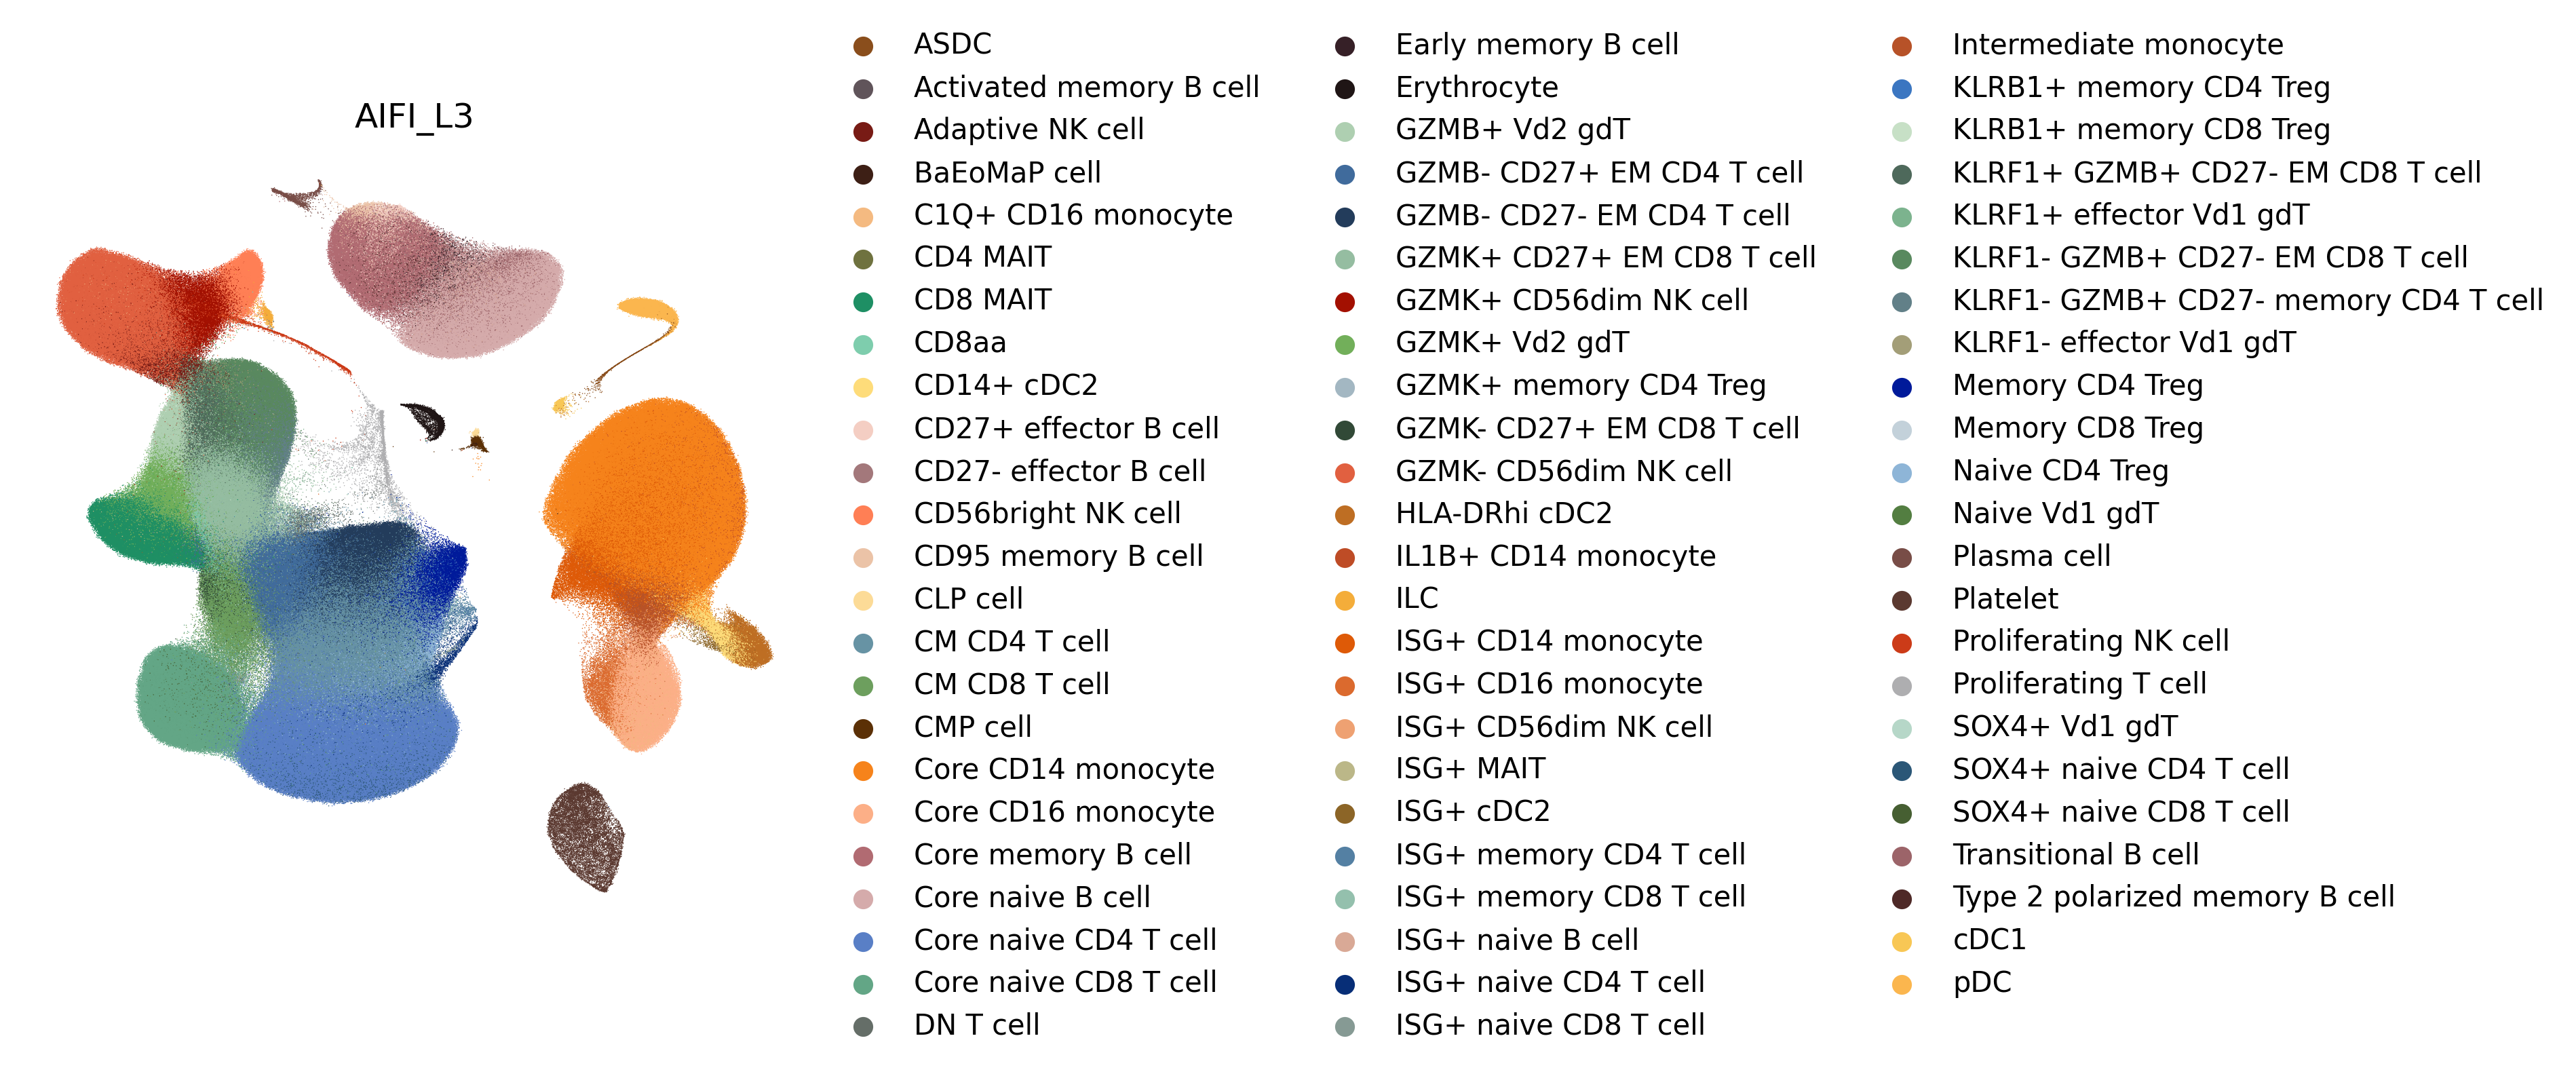

In [6]:
with plt.rc_context({"figure.figsize": (5, 5), "figure.dpi": 300, "figure.frameon": False}):
    ax=sc.pl.umap(adata, color=['AIFI_L3'], size=0.5,show=False,ncols=1 ,palette=color_dict,frameon=False)
    fig = ax.get_figure()
    fig.tight_layout()
    fig.savefig("FigureD.pdf", bbox_inches='tight')

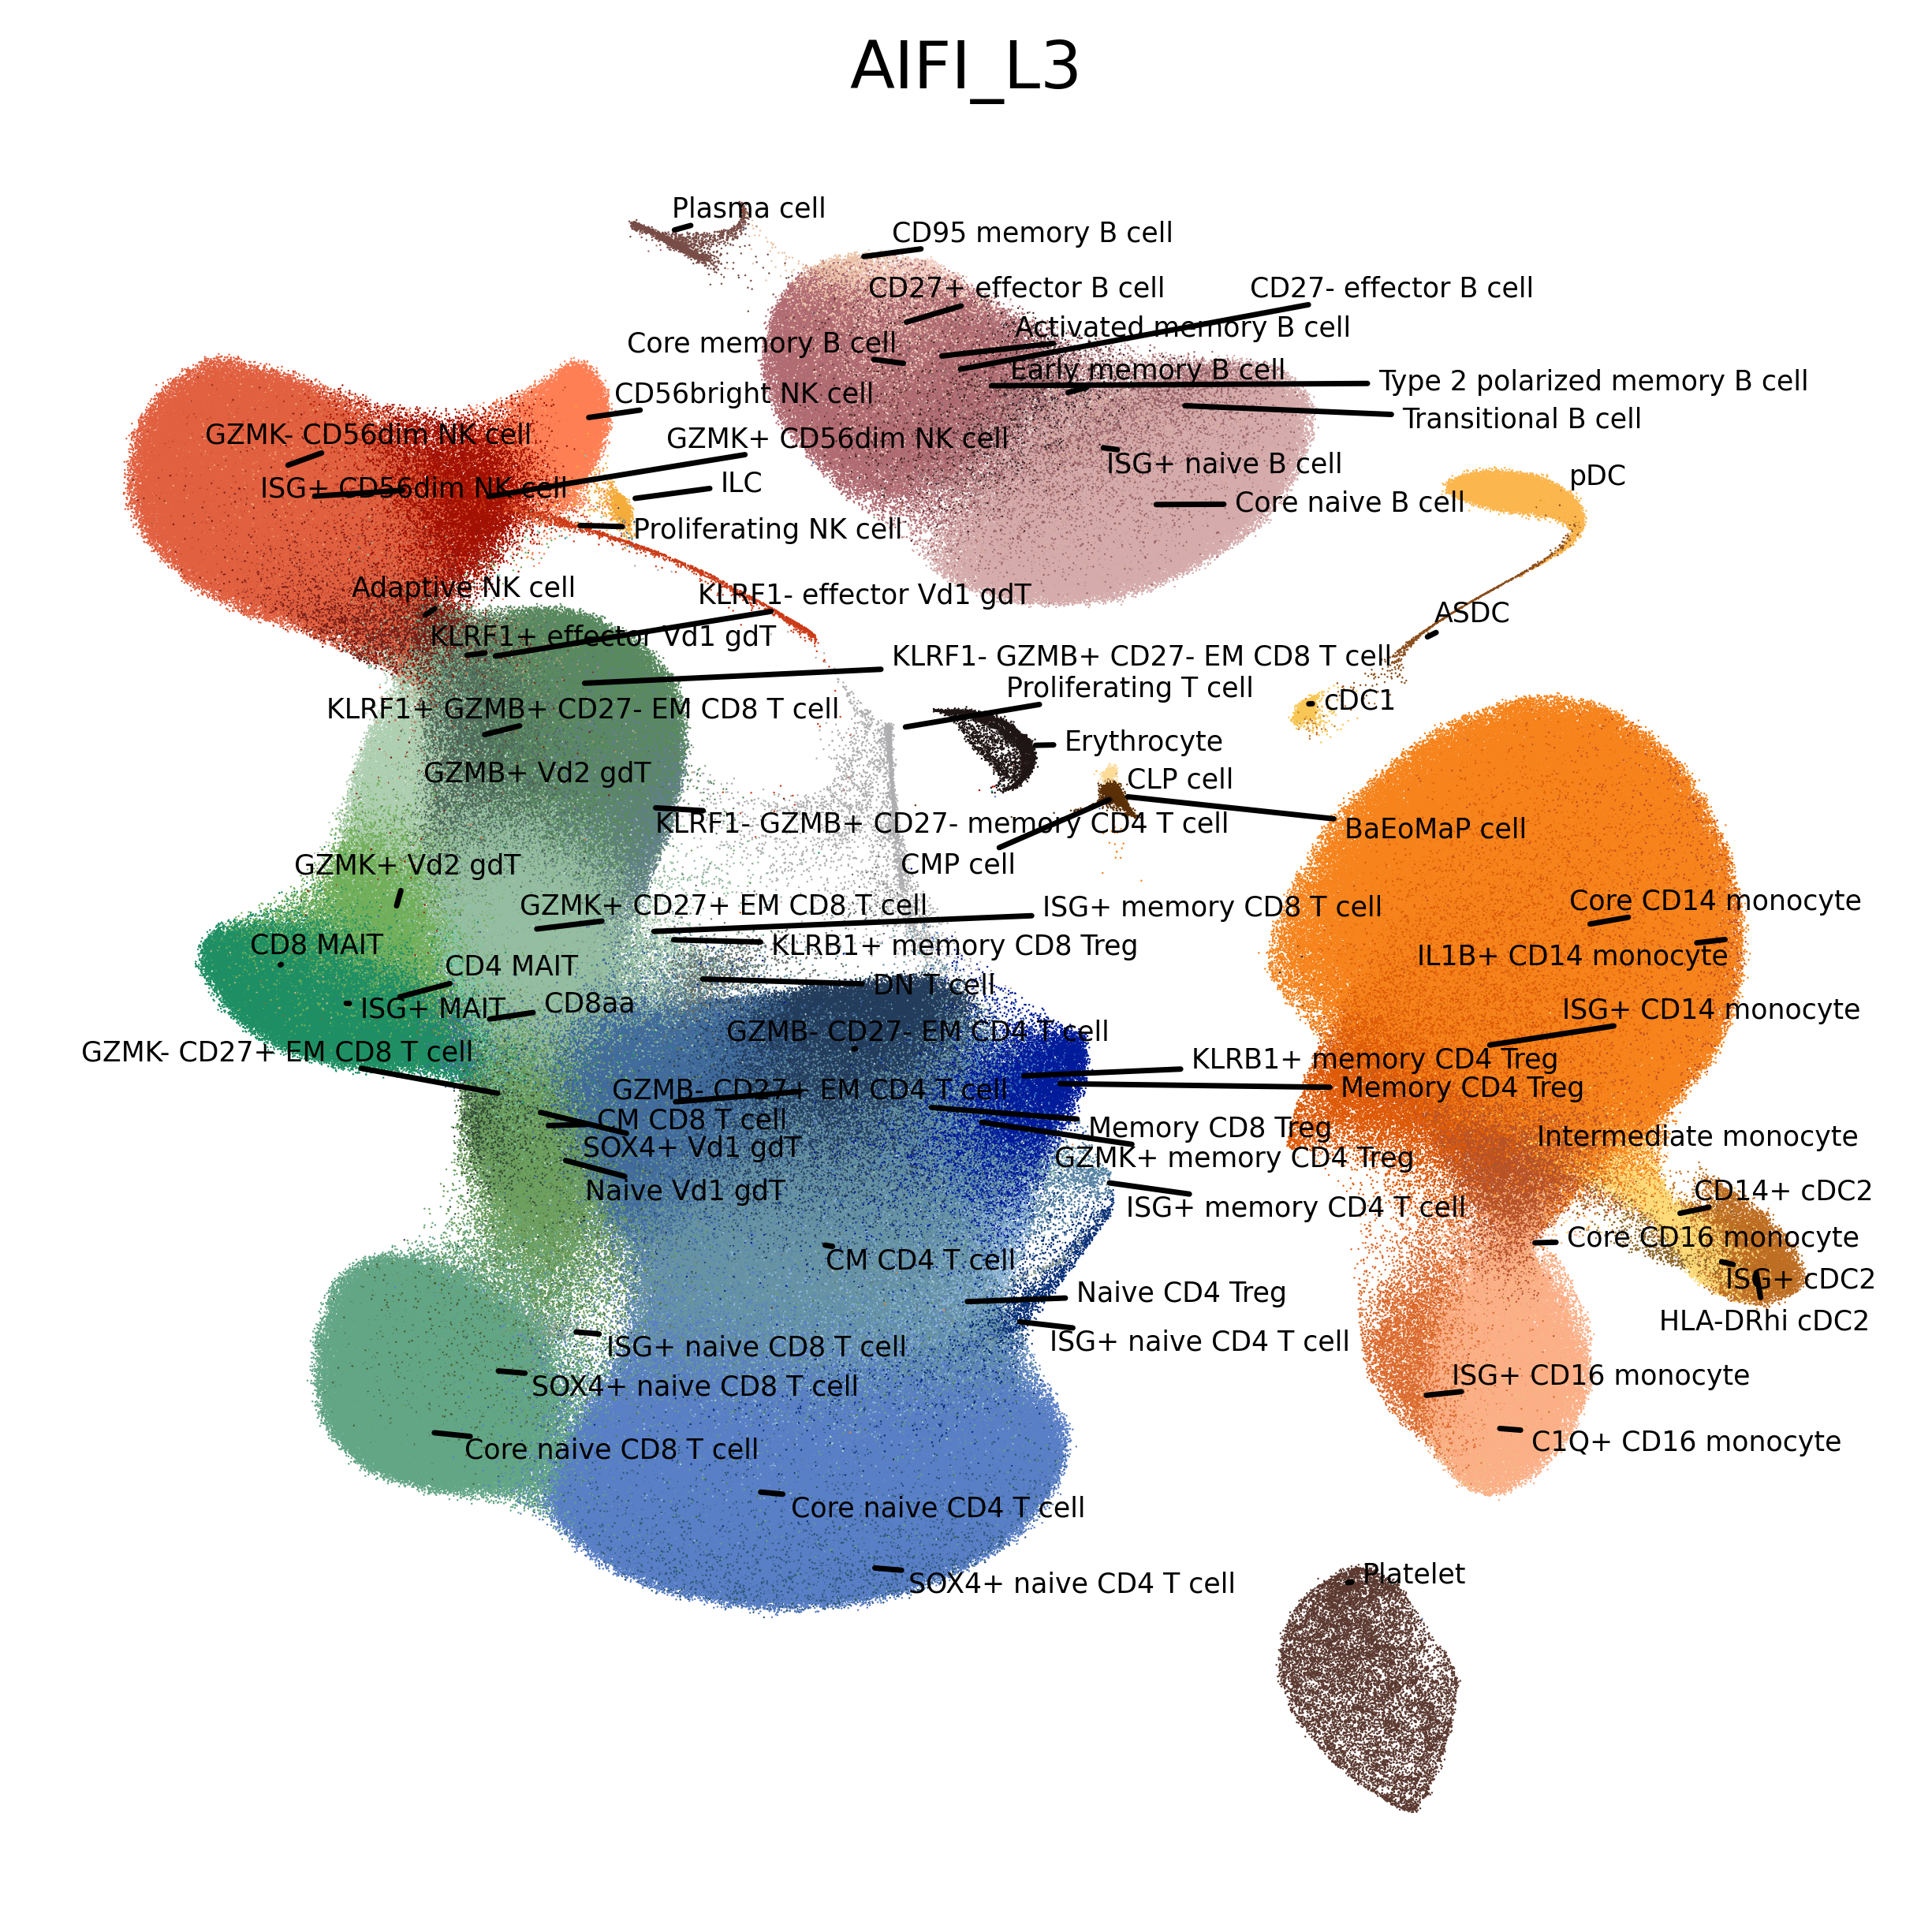

In [8]:
with plt.rc_context({"figure.figsize": (5, 5), "figure.dpi": 500, "figure.frameon": False}):
    ax=sc.pl.umap(adata, color=['AIFI_L3'], size=0.5,show=False,legend_loc=None,ncols=1,palette=color_dict,frameon=False)
    gen_mpl_labels(
        adata,
        "AIFI_L3",
        exclude=(""),  
        ax=ax,
        adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
        text_kwargs=dict(fontsize=5),)
    fig = ax.get_figure()
    fig.tight_layout()